
---

### Dataset yang dipakai:
1. Dataset [Data Pinjaman] - Sumber [https://www.kaggle.com/datasets/ardykaaw/data-pinjaman]
---

### Codingan :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
import pydotplus
import os
from sklearn.metrics import classification_report
from sklearn import tree
from IPython.display import Image
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix,roc_curve
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dataset = pd.read_csv("DATA_PINJAMAN.csv")
dataset.head()

,ID_Nasabah,JenisKelamin,StatusPernikahan,JumTanggungan,Pendidikan,Wiraswasta,IncomeNasabah,IncomePasangan,JumlahPinjaman,JangkaWaktuPinjaman,Credit_History,WilayahTempatTinggal,StatusPinjaman
0,LP001002,Male,No,0.0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y


In [3]:
dataset.describe()

,JumTanggungan,IncomeNasabah,IncomePasangan,JumlahPinjaman,JangkaWaktuPinjaman,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245928,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248406,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Nasabah            614 non-null    object 
 1   JenisKelamin          601 non-null    object 
 2   StatusPernikahan      611 non-null    object 
 3   JumTanggungan         599 non-null    float64
 4   Pendidikan            614 non-null    object 
 5   Wiraswasta            582 non-null    object 
 6   IncomeNasabah         614 non-null    int64  
 7   IncomePasangan        614 non-null    int64  
 8   JumlahPinjaman        592 non-null    float64
 9   JangkaWaktuPinjaman   600 non-null    float64
 10  Credit_History        564 non-null    float64
 11  WilayahTempatTinggal  614 non-null    object 
 12  StatusPinjaman        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [5]:
dataset1 = dataset.copy()

In [6]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Nasabah            614 non-null    object 
 1   JenisKelamin          601 non-null    object 
 2   StatusPernikahan      611 non-null    object 
 3   JumTanggungan         599 non-null    float64
 4   Pendidikan            614 non-null    object 
 5   Wiraswasta            582 non-null    object 
 6   IncomeNasabah         614 non-null    int64  
 7   IncomePasangan        614 non-null    int64  
 8   JumlahPinjaman        592 non-null    float64
 9   JangkaWaktuPinjaman   600 non-null    float64
 10  Credit_History        564 non-null    float64
 11  WilayahTempatTinggal  614 non-null    object 
 12  StatusPinjaman        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [7]:
dataset1.isnull().sum()

,0
ID_Nasabah,0
JenisKelamin,13
StatusPernikahan,3
JumTanggungan,15
Pendidikan,0
Wiraswasta,32
IncomeNasabah,0
IncomePasangan,0
JumlahPinjaman,22
JangkaWaktuPinjaman,14


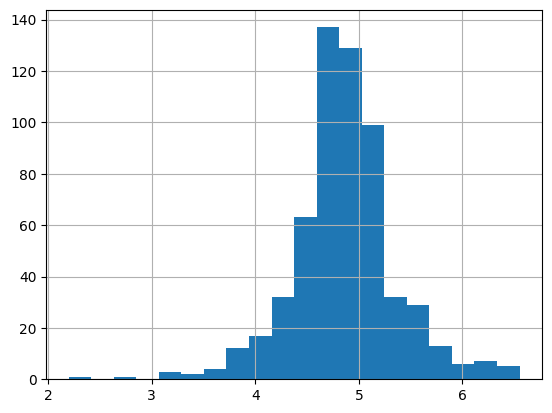

In [8]:
dataset1['JumlahPinjaman_log']= np.log(dataset1['JumlahPinjaman'])
dataset1['JumlahPinjaman_log'].hist(bins=20)
plt.show()

In [9]:
dataset1.isnull().sum()

,0
ID_Nasabah,0
JenisKelamin,13
StatusPernikahan,3
JumTanggungan,15
Pendidikan,0
Wiraswasta,32
IncomeNasabah,0
IncomePasangan,0
JumlahPinjaman,22
JangkaWaktuPinjaman,14


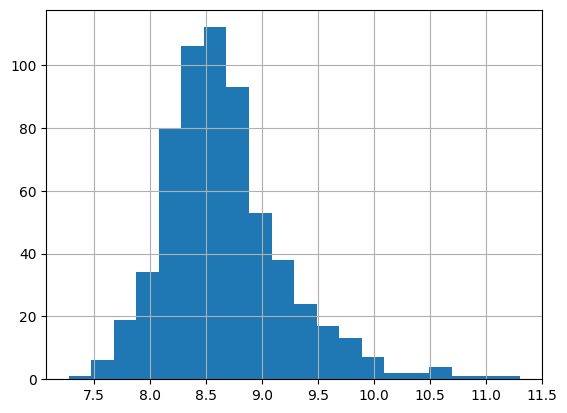

In [10]:
dataset1['TotalIncome'] = dataset1['IncomeNasabah'] + dataset1['IncomePasangan']
dataset1['TotalIncome_log'] = np.log(dataset1['TotalIncome'] + 1)  # Ditambah 1 untuk menghindari log(0)
dataset1['TotalIncome_log'].hist(bins=20)
plt.show()

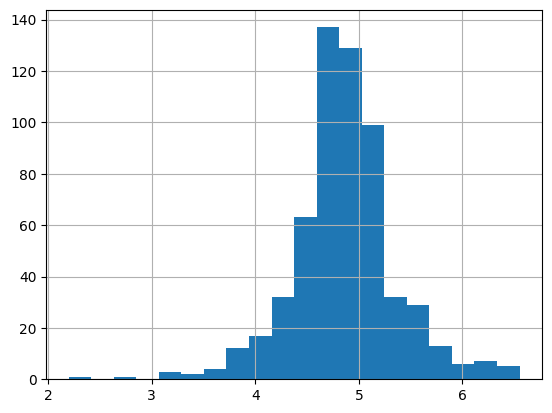

In [11]:
dataset1['JumlahPinjaman'] = np.log(dataset1['JumlahPinjaman'])
dataset1['JumlahPinjaman'].hist(bins=20)
plt.show()

In [12]:
dataset2 = dataset.copy()
dataset2.drop(columns=['IncomeNasabah', 'IncomePasangan'], inplace=True)
dataset2.head()

,ID_Nasabah,JenisKelamin,StatusPernikahan,JumTanggungan,Pendidikan,Wiraswasta,JumlahPinjaman,JangkaWaktuPinjaman,Credit_History,WilayahTempatTinggal,StatusPinjaman
0,LP001002,Male,No,0.0,Graduate,No,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,141.0,360.0,1.0,Urban,Y


In [14]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Nasabah            614 non-null    object 
 1   JenisKelamin          601 non-null    object 
 2   StatusPernikahan      611 non-null    object 
 3   JumTanggungan         599 non-null    float64
 4   Pendidikan            614 non-null    object 
 5   Wiraswasta            582 non-null    object 
 6   JumlahPinjaman        592 non-null    float64
 7   JangkaWaktuPinjaman   600 non-null    float64
 8   Credit_History        564 non-null    float64
 9   WilayahTempatTinggal  614 non-null    object 
 10  StatusPinjaman        614 non-null    object 
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


In [13]:
dataset2.describe()

,JumTanggungan,JumlahPinjaman,JangkaWaktuPinjaman,Credit_History
count,599.000000,592.000000,600.00000,564.000000
mean,0.762938,146.412162,342.00000,0.842199
std,1.015216,85.587325,65.12041,0.364878
min,0.000000,9.000000,12.00000,0.000000
25%,0.000000,100.000000,360.00000,1.000000
50%,0.000000,128.000000,360.00000,1.000000
75%,2.000000,168.000000,360.00000,1.000000
max,3.000000,700.000000,480.00000,1.000000


In [15]:
dataset2.isnull().sum()

,0
ID_Nasabah,0
JenisKelamin,13
StatusPernikahan,3
JumTanggungan,15
Pendidikan,0
Wiraswasta,32
JumlahPinjaman,22
JangkaWaktuPinjaman,14
Credit_History,50
WilayahTempatTinggal,0


In [16]:
#Impute Categorical Variable
JenisKelamin_mode = dataset2['JenisKelamin'].mode()[0]
StatusPernikahan_mode = dataset2['StatusPernikahan'].mode()[0]
Wiraswasta_mode = dataset2['Wiraswasta'].mode()[0]

dataset2['JenisKelamin'].fillna(JenisKelamin_mode, inplace=True)
dataset2['StatusPernikahan'].fillna(StatusPernikahan_mode, inplace=True)
dataset2['Wiraswasta'].fillna(Wiraswasta_mode, inplace=True)

In [17]:
#Impute numerical Variable
dataset2['JumTanggungan'].fillna(dataset2['JumTanggungan'].median(), inplace=True)
dataset2['JumlahPinjaman'].fillna(dataset2['JumlahPinjaman'].median(), inplace=True)
dataset2['JangkaWaktuPinjaman'].fillna(dataset2['JangkaWaktuPinjaman'].median(), inplace=True)
dataset2['Credit_History'].fillna(dataset2['Credit_History'].median(), inplace=True)

In [18]:
dataset2.isnull().sum()

,0
ID_Nasabah,0
JenisKelamin,0
StatusPernikahan,0
JumTanggungan,0
Pendidikan,0
Wiraswasta,0
JumlahPinjaman,0
JangkaWaktuPinjaman,0
Credit_History,0
WilayahTempatTinggal,0


In [19]:
dataset2

,ID_Nasabah,JenisKelamin,StatusPernikahan,JumTanggungan,Pendidikan,Wiraswasta,JumlahPinjaman,JangkaWaktuPinjaman,Credit_History,WilayahTempatTinggal,StatusPinjaman
0,LP001002,Male,No,0.0,Graduate,No,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,187.0,360.0,1.0,Urban,Y


In [20]:
LE = LabelEncoder()

#transform gender column
dataset2['JenisKelamin'] = LE.fit_transform(dataset2['JenisKelamin'])
print(np.sort(dataset2['JenisKelamin'].unique()))

#transform maried column
dataset2['StatusPernikahan'] = LE.fit_transform(dataset2['StatusPernikahan'])
print(np.sort(dataset2['StatusPernikahan'].unique()))

#transform Education column
dataset2['Pendidikan'] = LE.fit_transform(dataset2['Pendidikan'])
print(np.sort(dataset2['Pendidikan'].unique()))

#transform Self Employed column
dataset2['Wiraswasta'] = LE.fit_transform(dataset2['Wiraswasta'])
print(np.sort(dataset2['Wiraswasta'].unique()))

#transform Property Area
dataset2['WilayahTempatTinggal'] = LE.fit_transform(dataset2['WilayahTempatTinggal'])
print(np.sort(dataset2['WilayahTempatTinggal'].unique()))

#transform Status
dataset2['StatusPinjaman'] = LE.fit_transform(dataset2['StatusPinjaman'])
print(np.sort(dataset2['StatusPinjaman'].unique()))

[0 1]
[0 1]
[0 1]
[0 1]
[0 1 2]
[0 1]


In [21]:
dataset2.drop(columns=['ID_Nasabah'], inplace=True)
X = dataset2.loc[:, dataset2.columns!='StatusPinjaman']
y = dataset2['StatusPinjaman']

In [22]:
print("X Shape:", X.shape)
print("")
print("y Shape:", y.shape)

X Shape: (614, 9)

y Shape: (614,)


In [23]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)
# If needed, convert back to DataFrame
import pandas as pd
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

print("Jumlah X_train", X_train.shape)
print("Jumlah X_test:", X_test.shape)
print("Jumlah y_train:", y_train.shape)
print("Jumlah y_test:", y_test.shape)

Jumlah X_train (491, 9)
Jumlah X_test: (123, 9)
Jumlah y_train: (491,)
Jumlah y_test: (123,)


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# **2. Tentukan rentang nilai kedalaman pohon yang ingin diuji**
depth_range = range(3, 21)

# **3. Buat daftar untuk menyimpan skor validasi silang**
cross_val_scores = []

# **4. Lakukan validasi silang untuk setiap nilai kedalaman pohon**
for depth in depth_range:
    clftree = DecisionTreeClassifier(max_depth=depth, random_state=42)  # Tambahkan random_state agar hasil konsisten
    scores = cross_val_score(clftree, X_train, y_train, cv=5)  # Gunakan X_train dan y_train
    cross_val_scores.append(scores.mean())

# **5. Temukan nilai kedalaman pohon terbaik**
best_depth = depth_range[cross_val_scores.index(max(cross_val_scores))]

# **6. Cetak hasil validasi silang terbaik**
print("Skor validasi silang terbaik:", max(cross_val_scores))
print("Nilai kedalaman pohon terbaik:", best_depth)

Skor validasi silang terbaik: 0.796310039167182
Nilai kedalaman pohon terbaik: 3


In [26]:
dt = DecisionTreeClassifier(max_depth=best_depth, random_state=42)  # Gunakan best_depth yang ditemukan

# **8. Tentukan daftar nilai min_samples_leaf untuk dievaluasi**
min_samples_leaf = [1, 5, 10, 15]

# **9. Tentukan parameter grid**
param_grid = {'min_samples_leaf': min_samples_leaf}

# **10. Inisialisasi GridSearchCV**
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# **11. Melakukan pelatihan pada dataset**
grid_search.fit(X_train, y_train)

# **12. Mendapatkan skor akurasi dan parameter terbaik**
best_score = grid_search.best_score_
best_params = grid_search.best_params_

# **13. Cetak hasil**
print("Skor Akurasi Terbaik:", best_score)
print("Parameter Terbaik:", best_params)

Skor Akurasi Terbaik: 0.7983714698000413
Parameter Terbaik: {'min_samples_leaf': 10}


In [27]:
dt = DecisionTreeClassifier(random_state=42)  # Tambahkan random_state agar hasil konsisten

# **3. Tentukan daftar nilai `min_samples_split` untuk evaluasi**
min_samples_split = [2, 5, 10, 15]

# **4. Tentukan parameter grid**
param_grid = {'min_samples_split': min_samples_split}

# **5. Inisialisasi GridSearchCV**
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# **6. Melakukan pelatihan pada dataset**
grid_search.fit(X_train, y_train)

# **7. Mendapatkan skor akurasi dan parameter terbaik**
best_score = grid_search.best_score_
best_params = grid_search.best_params_

# **8. Cetak hasil**
print("Skor Akurasi Terbaik:", best_score)
print("Parameter Terbaik:", best_params)

Skor Akurasi Terbaik: 0.7066790352504638
Parameter Terbaik: {'min_samples_split': 15}


In [28]:
clftree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=15, min_samples_split=10, random_state=0)
clftree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=15,
                       min_samples_split=10, random_state=0)

In [29]:
# gain information
gain_info = clftree.feature_importances_

# show gain value each feature
for feature, importance in zip(range(X.shape[1]), gain_info):
    print(f"Feature {feature+1}: {importance}")

Feature 1: 0.0
Feature 2: 0.0
Feature 3: 0.0
Feature 4: 0.0
Feature 5: 0.02655554100764305
Feature 6: 0.09830574459823453
Feature 7: 0.0
Feature 8: 0.8437275134077532
Feature 9: 0.03141120098636905


In [30]:
pip install pydotplus graphviz

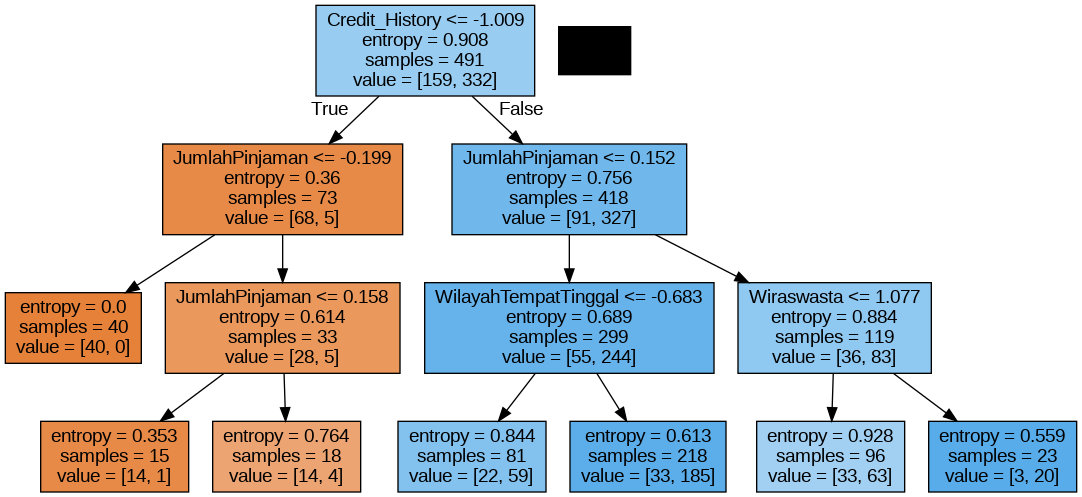

In [31]:
dot_data = tree.export_graphviz(clftree, out_file=None, feature_names=X_train.columns,filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [32]:
y_train_pred = clftree.predict(X_train)
y_pred = clftree.predict(X_test)

In [33]:
confusion_matrix(y_train, y_train_pred)

array([[ 68,  91],
       [  5, 327]])

In [34]:
confusion_matrix(y_test, y_pred)

array([[14, 19],
       [ 2, 88]])

In [35]:
# Evaluasi kinerja pada data pelatihan
train_predictions = clftree.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on training data:", train_accuracy)

# Evaluasi kinerja pada data testing
test_predictions = clftree.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy on testing data:", test_accuracy)

Accuracy on training data: 0.8044806517311609
Accuracy on testing data: 0.8292682926829268


In [38]:
from sklearn.metrics import classification_report, accuracy_score

# Prediksi dan evaluasi untuk data pelatihan
train_predictions = clftree.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on training data:", train_accuracy)
print("Classification report on training data:")
print(classification_report(y_train, train_predictions))

# Prediksi dan evaluasi untuk data testing
test_predictions = clftree.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy on testing data:", test_accuracy)
print("Classification report on testing data:")
print(classification_report(y_test, test_predictions))

Accuracy on training data: 0.8044806517311609
Classification report on training data:
              precision    recall  f1-score   support

           0       0.93      0.43      0.59       159
           1       0.78      0.98      0.87       332

    accuracy                           0.80       491
   macro avg       0.86      0.71      0.73       491
weighted avg       0.83      0.80      0.78       491

Accuracy on testing data: 0.8292682926829268
Classification report on testing data:
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



ROC AUC: 0.6962962962962962
Confusion Matrix:
[[14 19]
 [ 2 88]]


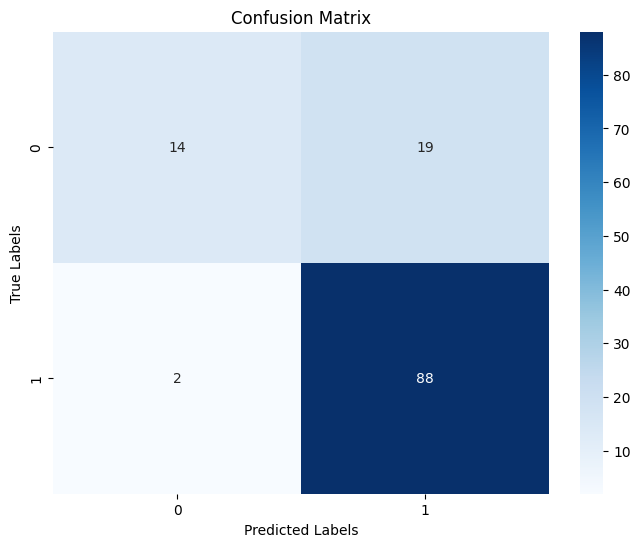

In [39]:
# create probabilty positive
y_scores = clftree.predict_proba(X_test)[:, 1]

# Roc Auc
roc_auc = roc_auc_score(y_test, y_scores)
print("ROC AUC:", roc_auc)

# Confusion Matrix
y_pred = clftree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

ROC AUC: 0.6962962962962962


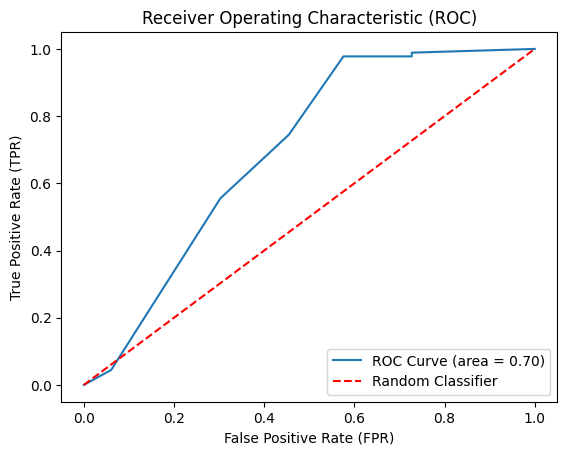

In [40]:
# Prediksi probabilitas kelas positif
y_scores = clftree.predict_proba(X_test)[:, 1]

# Menghitung false positive rate (FPR), true positive rate (TPR), dan thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Menghitung ROC AUC
roc_auc = roc_auc_score(y_test, y_scores)
print("ROC AUC:", roc_auc)

# Plotting kurva ROC
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [41]:
# Inisialisasi model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Lakukan 5-fold Cross Validation pada data pelatihan
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Tampilkan hasil cross-validation
print("Cross Validation Scores (Accuracy):", cv_scores)
print("Rata-rata akurasi CV:", np.mean(cv_scores))
print("Standar deviasi akurasi CV:", np.std(cv_scores))

Cross Validation Scores (Accuracy): [0.64646465 0.67346939 0.65306122 0.66326531 0.67346939]
Rata-rata akurasi CV: 0.6619459905174192
Standar deviasi akurasi CV: 0.010825239420044958
